
# Data curation

Man Ho Wong | m.wong@pitt.edu | Feb 27th, 2022

This notebook search for the datasets needed for this project in the following database:
- [CHILDES](https://childes.talkbank.org/)  
  *Reference:* MacWhinney, B. (2000). The CHILDES Project: Tools for analyzing talk. Third Edition. Mahwah, NJ: Lawrence Erlbaum Associates.

I may not need datasets from [Wordbank](http://wordbank.stanford.edu/) as I found that CHILDES probably has all the data I need.

I will also explore the datasets on the way to get a sense of the contents and the structures of the datasets (such as participant information, annotations, data format, etc.), as well as some basic statistics about the datasets. After that, I will identify the information I need in the datasets and compile the data for data processing later.

---

In [10]:
# Python libraries and packages required for this notebook. See Section 1.1 for
#   pylangacq installation.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import pylangacq                 # See Section 1.1
from tqdm import tqdm            # For showing progress bar

# Unpickle data
data = pickle.load(open('data/childes/corpus_info.pkl', 'rb'))
search_result = data[0]
data_idx = data[1]


# 1 Searching for suitable corpora in CHILDES

CHILDES is a multilingual database containing corpora with transcriptions, audio recordings and/or video recordings of child speech and child-directed speech (CDS) at different developmental stages. Each corpus has a separate directory for each participant, and each directory contains the recording transcripts stored in CHAT formats. ([Example](https://childes.talkbank.org/access/Eng-NA/Brown.html))

For this project, I will need to collect the transcipts for both the child speech and the associated CDS. Additionally, I will need the participant information (i.e. child age, sex and socioeconomic status (SES), mother's education) and some basic annotations of the words (i.e. morphemes and lexical categories). Participant information can be found in the header of each CHAT file as the metadata of the file. Annotation information can be found as dependent tiers embedded in the transcription.

Let's take a quick look at a sample CHAT file first to see how the data is organized.


## 1.1 Acccessing data in CHAT file

### Reading CHAT file

The `PyLangAcq` package allows users to read CHAT files directly from a zip file. You can download and install it with the following code:  
`$ pip install --upgrade pylangacq`

For documentation, you can visit their [website](https://pylangacq.org/).

I will use the Brown Corpus of CHILDES as an example below. The corpus has been downloaded from [here](https://childes.talkbank.org/data/Eng-NA/Brown.zip) and stored under `data_samples/childes/Brown.zip`. There are three folders in this corpus, each folder contains a dataset (a collection of CHAT files) for each child:

```
Brown.zip/  
    |--Adam/  
    |--Eve/  
    |--Sarah/
```

I will use the `read_chat()` function of `PyLangAcq` to read all the CHAT files in the dataset `Adam`:

In [2]:
# Read CHAT files in the dataset 'Adam' in 'Brown.zip':
path = 'data_samples/childes/Brown.zip'
adam = pylangacq.read_chat(path, 'Adam')

print(type(adam))
print('Number of CHAT files:', adam.n_files())

<class 'pylangacq.chat.Reader'>
Number of CHAT files: 55


In [3]:
# Ages when recordings were made
print('Ages (year, month, day):', adam.ages())  # output: a list of tuples

Ages (year, month, day): [(2, 3, 4), (2, 3, 18), (2, 4, 3), (2, 4, 15), (2, 4, 30), (2, 5, 12), (2, 6, 3), (2, 6, 17), (2, 7, 1), (2, 7, 14), (2, 8, 1), (2, 8, 16), (2, 9, 4), (2, 9, 18), (2, 10, 2), (2, 10, 16), (2, 10, 30), (2, 11, 13), (2, 11, 28), (3, 0, 11), (3, 0, 25), (3, 1, 9), (3, 1, 26), (3, 2, 9), (3, 2, 21), (3, 3, 4), (3, 3, 18), (3, 4, 1), (3, 4, 18), (3, 5, 1), (3, 5, 15), (3, 5, 29), (3, 6, 9), (3, 7, 7), (3, 8, 1), (3, 8, 14), (3, 8, 26), (3, 9, 16), (3, 10, 15), (3, 11, 1), (3, 11, 14), (4, 0, 14), (4, 1, 15), (4, 2, 17), (4, 3, 9), (4, 4, 1), (4, 4, 13), (4, 5, 11), (4, 6, 24), (4, 7, 1), (4, 7, 29), (4, 9, 2), (4, 10, 2), (4, 10, 23), (5, 2, 12)]


As shown above, `read_chat()` read the CHAT files and creates a `Reader` object. This is a `dataclass` storing data and metadata across all the CHAT files in `Adam`. You can access the data stored in the `Reader` by calling the appropriate methods/ attributes, such as `.n_files()` for number of CHAT files in the dataset. For example, `Adam` has 55 CHAT files. We can also get the ages when recordings were made by calling `.ages()`. Let's see what other information we can get from the `Reader` object in the next section.

### Accessing metadata stored in a CHAT file

Metadata such as age range, date of recording, participants, etc. are stored in the header of each CHAT file. We can access such information by retrieving the `.header()` attribute. Here is the header for the first CHAT file in `adam`:

In [4]:
adam.headers()[0]

{'UTF8': '',
 'PID': '11312/c-00015632-1',
 'Languages': ['eng'],
 'Participants': {'CHI': {'name': 'Adam',
   'language': 'eng',
   'corpus': 'Brown',
   'age': '2;03.04',
   'sex': 'male',
   'group': 'TD',
   'ses': 'MC',
   'role': 'Target_Child',
   'education': '',
   'custom': ''},
  'MOT': {'name': 'Mother',
   'language': 'eng',
   'corpus': 'Brown',
   'age': '',
   'sex': 'female',
   'group': '',
   'ses': '',
   'role': 'Mother',
   'education': '',
   'custom': ''},
  'URS': {'name': 'Ursula_Bellugi',
   'language': 'eng',
   'corpus': 'Brown',
   'age': '',
   'sex': '',
   'group': '',
   'ses': '',
   'role': 'Investigator',
   'education': '',
   'custom': ''},
  'RIC': {'name': 'Richard_Cromer',
   'language': 'eng',
   'corpus': 'Brown',
   'age': '',
   'sex': '',
   'group': '',
   'ses': '',
   'role': 'Investigator',
   'education': '',
   'custom': ''},
  'COL': {'name': 'Colin_Fraser',
   'language': 'eng',
   'corpus': 'Brown',
   'age': '',
   'sex': '',
   

The output above, is a multilevel `dictionary`. To retrieve a specific piece of information we need, we can use the `dictionary` keys as usual.  
Let's check if 'Adam' is a male as its biblical name suggests:

In [5]:
adam.headers()[0]['Participants']['CHI']['sex']

'male'


### Accessing annotations

Next, I will check what kinds of annotation information are stored in each CHAT file. I will use the `.tokens()` method to access the tokens with annotation information. This method creates a `list` of `Token` objects:

In [6]:
tokens = adam.tokens()
tokens[:5]  # first five tokens

[Token(word='play', pos='n', mor='play', gra=Gra(dep=1, head=2, rel='MOD')),
 Token(word='checkers', pos='n', mor='checker-PL', gra=Gra(dep=2, head=0, rel='INCROOT')),
 Token(word='.', pos='.', mor='', gra=Gra(dep=3, head=2, rel='PUNCT')),
 Token(word='big', pos='adj', mor='big', gra=Gra(dep=1, head=2, rel='MOD')),
 Token(word='drum', pos='n', mor='drum', gra=Gra(dep=2, head=0, rel='INCROOT'))]

Each `Token` is a `dataclass` with attributes (e.g. `word`,`pos`, etc.) as shown in the above example.  
Annotations for each word are stored as the `Token`'s attributes (i.e. attributes other than `word`):

In [7]:
print("Second token in 'Adam':")
print('Word: {}\nMorpheme: {}\nPart of speech: {}'.format(
    tokens[1].word, tokens[1].mor, tokens[1].pos))

Second token in 'Adam':
Word: checkers
Morpheme: checker-PL
Part of speech: n



## 1.2 Search strategy

Now that we know what kinds of information are stored in each CHAT file and how we can access them, we can start planning our search accordingly.

### Identifying the scope of search

There are dozens of English corpora in CHILDES. We don't need to download them all at once just to look for the corpora we need. `PyLangAcq` allows user to read a corpus directly with the corpus's URL. We can read the corpora one by one, and keep only the ones we need. To get the URLs for all the North American (NA) English corpora, one can use a web scraping tool to get all the links from the database's website and look for the corpus URLs from there. However, a much faster way is to take advantage of the TalkBank's [browsable database](https://sla.talkbank.org/TBB/childes):  
1. navigate to CHILDES's North American English datasets (Eng-NA)
2. copy the list of corpora directly to a spreadsheet program and save it as a `csv` file (example: `data_samples/childes/eng_NA_corpus_list.csv`)
3. construct the URL for each corpus simply from the name of the corpus we get from step 2 (see below)

CHILDES has a very well organized structure. Each corpus has the same URL format as follow:  
`https://childes.talkbank.org/data/LANGUAGE/NAME_OF_CORPUS.zip`  
For example, the URL for the Brown Corpus is: https://childes.talkbank.org/data/Eng-NA/Brown.zip

Let's see what corpora will be included in our search:

In [8]:
import pandas as pd

# Read the list of corpora into a Pandas Series:
corpus_list = pd.read_csv('data/childes/eng_NA_corpus_list.csv', 
                          header=None, index_col=False, squeeze = True)

print('There are {} NA English corpora in CHILDES.'.format(len(corpus_list)))
print('Here are the first 10 corpora:')
corpus_list.head(10)

There are 47 NA English corpora in CHILDES.
Here are the first 10 corpora:


0        Bates
1    Bernstein
2        Bliss
3        Bloom
4     Bohannon
5    Braunwald
6        Brent
7        Brown
8        Clark
9    Demetras1
Name: 0, dtype: object

There are 47 NA English corpora in CHILDES that we can potentially use! Since there is a huge volume of data that we have to evaluate, we need a good strategy to make the data search more efficient. For this project, I will develop a search stretegy similar to a data collection process following PRISMA (Preferred Reporting Items for Systematic Reviews and Meta-Analyses) statement ([flow diagram](https://view.officeapps.live.com/op/view.aspx?src=http%3A%2F%2Fwww.prisma-statement.org%2Fdocuments%2FPRISMA_2020_flow_diagram_new_SRs_v1.docx&wdOrigin=BROWSELINK), [publication](https://journals.plos.org/plosmedicine/article?id=10.1371/journal.pmed.1003583)), which is commonly used in medicine and life sciences for meta-analyses.

### Searching data in three phases

Instead of evaluating each of the CHAT files from all 47 corpora directly, I will perform the search in three phases, where each phase narrows down the scope of search. As the scope of search is becoming more manageable, I will use search criteria that are more specific. 

1. **Identification**  
    Identify relevant corpora fitting a set of basic criteria  
2. **Screening**  
    Screen for CHAT files containing the information we need  
3. **Refining**  
    Refine the dataset by filtering CHAT files with more specific criteria

## 1.3 Run the search

### Phase 1: Identification

I will first search for the corpora meeting the basic requirements of the project, i.e. corpora involving relevant participants (child for child speech analysis and mother for CDS analysis).

Here are the search criteria:
- Participants: data includes child or mother
- Child information: data contains child age, sex and socioeconomic status (SES) information
- Mother information: data contains socioeconomic status (SES), education information

To access participant information, we can first read the data into a `Reader` object, and then retrieve the header information from the `.headers` attribute.

#### About efficiency

Reading all corpora at once into one `Reader` object is not memory-efficient, but reading each single CHAT file into a `Reader` involves a large number of iterations. Therefore, I will read and evaluate one corpus at a time. Once a CHAT file in the corpus fits the criteria, the rest of the CHAT files will not be evaluated and I will move on to the next corpus (because CHAT files belonging to the same corpus are supposed to come from the same study contain similar information).

The `.headers` of a `Reader` contains a `list` of headers of *all* the CHAT files in the dataset.  
Let's look at our favorite dataset 'Adam' again. Here are the headers of the first two CHAT files in 'Adam':

In [9]:
adam.headers()[:2]

[{'UTF8': '',
  'PID': '11312/c-00015632-1',
  'Languages': ['eng'],
  'Participants': {'CHI': {'name': 'Adam',
    'language': 'eng',
    'corpus': 'Brown',
    'age': '2;03.04',
    'sex': 'male',
    'group': 'TD',
    'ses': 'MC',
    'role': 'Target_Child',
    'education': '',
    'custom': ''},
   'MOT': {'name': 'Mother',
    'language': 'eng',
    'corpus': 'Brown',
    'age': '',
    'sex': 'female',
    'group': '',
    'ses': '',
    'role': 'Mother',
    'education': '',
    'custom': ''},
   'URS': {'name': 'Ursula_Bellugi',
    'language': 'eng',
    'corpus': 'Brown',
    'age': '',
    'sex': '',
    'group': '',
    'ses': '',
    'role': 'Investigator',
    'education': '',
    'custom': ''},
   'RIC': {'name': 'Richard_Cromer',
    'language': 'eng',
    'corpus': 'Brown',
    'age': '',
    'sex': '',
    'group': '',
    'ses': '',
    'role': 'Investigator',
    'education': '',
    'custom': ''},
   'COL': {'name': 'Colin_Fraser',
    'language': 'eng',
    'cor

Each header is a multi-level `dictionary`. To access the participant information in each of the headers, one can loop through each header and index into the sub-level dictionary associated with the key `Participants`. For example:

In [10]:
for h in adam.headers():
    if 'MOT' in h ['Participants']:  # search criterion
        print('At least one file involves mother as a participant in the dataset "Adam"!')
        break  # Break the loop once the search criterion is met

At least one file involves mother as a participant in the dataset "Adam"!


Let's begin the first phase of the search:

In [11]:
search_result = []  # To store a list of corpora matching the criteria

# Search each corpus in the list:
for corpus_name in tqdm(corpus_list):  # tqdm for progress bar
    
    # Download URL for the corpus:
    corpus_url = 'https://childes.talkbank.org/data/Eng-NA/'+corpus_name+'.zip'
    
    # read the corpus into a Reader object:
    corpus = pylangacq.read_chat(corpus_url)
   
    # Search criteria:  
    # - Child ('CHI') is included as participant.
    # - Info about Child's SES or mother's SES/education is provided.
    # Note: Check if 'MOT' is present before checking SES/education info
    #       (if the condition before 'and' is False, the second condition won't
    #       be evaluated. This is not only more efficient, but also prevents
    #       error when evaluating the second condition if 'MOT' is absent)
    
    for h in corpus.headers():
        if (
            # 'CHI' must be included
            ('CHI' in h['Participants']) 
            
            and
            
            # Must contain info about either SES or mother's education
            (
                # Child's or mother's SES 
                ((h['Participants']['CHI']['ses'] != '') or
                (('MOT' in h['Participants']) and (h['Participants']['MOT']['ses'] != '')))
                
                or
                
                # Mother's education
                (('MOT' in h['Participants']) and (h['Participants']['MOT']['education'] != ''))
            )
            
        ):
            search_result.append(corpus_name)  # store corpus name in 'search_result'
            break  # Break the for loop and move on to the next corpus

print('Search completed! {} corpora found!'.format(len(search_result)))

100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [07:45<00:00,  9.91s/it]

Search completed! 13 corpora found!


Let's see which corpora contain the data we need:

In [13]:
print('\n{} corpora matching the criteria:'.format(len(search_result)))
search_result


13 corpora matching the criteria:


['Bates',
 'Bernstein',
 'Brown',
 'Clark',
 'Demetras2',
 'Gleason',
 'HSLLD',
 'Hall',
 'Hicks',
 'Nelson',
 'NewmanRatner',
 'Post',
 'VanHouten']

Nice! We have narrowed down the number of corpora we need to process from 47 to 13.  
Next, I will download the zip files for the corpora to the local drive and extract them to the folder `data/childes/`.

In [ ]:
import os
import urllib.request
import zipfile

# Where zip files will be stored locally
target_dir = 'data/childes/corpus_zip/'

# Create a folder to store the zip files
os.mkdir(target_dir)

for corpus_name in search_result:
    
    print('Downloading and extracting {}...'.format(corpus_name))
    
    # Corpus's download URL:
    corpus_url = 'https://childes.talkbank.org/data/Eng-NA/'+corpus_name+'.zip'
    
    # Path in local drive:
    zip_path = target_dir + corpus_name + '.zip'
    
    # Download corpus from URL
    urllib.request.urlretrieve(corpus_url, zip_path)
    
    # Extract zip file
    with zipfile.ZipFile(zip_path, 'r') as z:
        z.extractall('data/childes')
        
print('Done! Zip files were stored in {} \nand extracted to {}.'
      .format(target_dir, 'data/childes'))

### Phase 2: Screening

All the corpora matching the search criteria in Phase 1 were downloaded to local drive. From now on, I will read the data locally instead of remotely.

Since not all the CHAT files were inspected in Phase 1, we are not sure whether all files match the search criteria and could be used for data analysis. In addition, some corpora contain dummy files, and some contain data we don't need, such as parent interviews ([example](https://sla.talkbank.org/TBB/childes/Eng-NA/Bernstein/Interview/Alice/alice1.cha)). Therefore, in Phase 2, I will inspect all the files to screen for files that I need. In this Phase, I will also include child's age in the search criteria. Because I am studying vocabulary development in early childhood, I will exclude the files  with children older than 6 years for now (I will refine the age range later). I will also create a `DataFrame` to index all the CHAT files that match the search criteria and store their header information for further data processing.

In [14]:
# Create lists to store header variables
file_path_list   = []
corpus_name_list = []
year_list        = []  # recording year
participant_list = []  # participants of recording
chi_name_list    = []  # Child's name
chi_age_d_list   = []  # Child's age in days
chi_age_m_list   = []  # Child's age in months
chi_sex_list     = []  # Child's sex
chi_group_list   = []  # Child's group (e.g. typically developed)
chi_ses_list     = []  # Child's SES (socioeconomic status; same as mother's)
mot_edu_list     = []  # Mother's education

for corpus_name in tqdm(search_result):  # tqdm for progress bar
    
    # Read the corpus into a Reader object:
    corpus = pylangacq.Reader.from_dir('data/childes/'+corpus_name)
    
    for f in corpus:                    # Inspect each file in the corpus
        h = f.headers()[0]              # Header of each file     
        if 'CHI' in h['Participants']:  # Include only the files with 'CHI' info
            
            age_raw     = f.ages()[0]   # Age in raw format
            chi_age_d   = (age_raw[0]*12 + age_raw[1])*30 + age_raw[2]
            chi_age_m   = age_raw[0]*12 + age_raw[1] + round(age_raw[2]/30,1)

            if chi_age_m <= 72:  # Include file only only children <= 72 months
            
                # Get info we need from the header
                file_path    = f.file_paths()[0].replace('\\','/')                
                corpus_name  = h['Participants']['CHI']['corpus']
                participants = f.participants()
                chi_name     = h['Participants']['CHI']['name']
                chi_sex      = h['Participants']['CHI']['sex']
                chi_group    = h['Participants']['CHI']['group']
                chi_ses      = h['Participants']['CHI']['ses']
                
                # Get 'MOT' info only if 'MOT' exsits
                if 'MOT' in h['Participants']:
                    mot_edu = h['Participants']['MOT']['education']                    
                    # Just in case SES info is stored in 'MOT' instead of 'CHI'
                    if h['Participants']['MOT']['ses'] != '':
                        chi_ses = h['Participants']['MOT']['ses']
                else:             # Prevent using value from last iteration when
                    mot_edu = ''  #   'MOT' doesn't exist
                                              
                # Get recording year if date is provided in the header
                if 'Date' in h:
                    year = list(h['Date'])[0].year
                else:             # Prevent using value from last iteration when
                    year = np.nan #  date is not provided
                    
                # Create a list for each variable (will be column of DataFrame)
                file_path_list.append(file_path) 
                corpus_name_list.append(corpus_name)
                year_list.append(year)
                participant_list.append(participants)
                chi_name_list.append(chi_name)
                chi_age_d_list.append(chi_age_d)
                chi_age_m_list.append(chi_age_m)
                chi_sex_list.append(chi_sex)
                chi_group_list.append(chi_group)
                chi_ses_list.append(chi_ses)
                mot_edu_list.append(mot_edu)
                
# Build a DataFrame to store header information
data_idx = pd.DataFrame({'file_path':file_path_list,
                         'corpus':corpus_name_list,
                         'year': year_list,
                         'participants': participant_list,
                         'name':chi_name_list,
                         'age_d':chi_age_d_list,
                         'age_m':chi_age_m_list,
                         'sex':chi_sex_list,
                         'group':chi_group_list,
                         'ses':chi_ses_list,
                         'mot_edu':mot_edu_list})

print('Done!')

# Fill unspecified entries (except 'year') with 'unspecified'
data_idx.replace(to_replace = '', value = 'unspecified', inplace=True)
data_idx

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [03:32<00:00, 16.33s/it]

Done!


,file_path,corpus,year,participants,name,age_d,age_m,sex,group,ses,mot_edu
0,data/childes/Bates/Free20/amy.cha,Bates,NaN,"{CHI, MOT}",Target_Child,600,20.0,female,TD,MC,
1,data/childes/Bates/Free20/betty.cha,Bates,NaN,"{CHI, MOT}",Betty,600,20.0,female,TD,MC,
2,data/childes/Bates/Free20/chuck.cha,Bates,NaN,"{CHI, MOT}",Chuck,600,20.0,male,TD,MC,
3,data/childes/Bates/Free20/doug.cha,Bates,NaN,"{CHI, MOT}",Doug,600,20.0,male,TD,MC,
4,data/childes/Bates/Free20/ed.cha,Bates,NaN,"{MOT, CHI}",Ed,600,20.0,male,TD,MC,
...,...,...,...,...,...,...,...,...,...,...,...
2606,data/childes/VanHouten/Twos/teaching/parkt.cha,VanHouten,NaN,"{MOT, CHI}",Matthew,840,28.0,male,MOT_Older,,
2607,data/childes/VanHouten/Twos/teaching/pricet.cha,VanHouten,NaN,"{CHI, MOT}",Peter,840,28.0,male,MOT_adolescent,,
2608,data/childes/VanHouten/Twos/teaching/raidt.cha,VanHouten,NaN,"{CHI, MOT}",Tommy,840,28.0,male,MOT_older,,
2609,data/childes/VanHouten/Twos/teaching/riott.cha,VanHouten,NaN,"{CHI, MOT}",Robert,840,28.0,male,MOT_Adolescent,,


Let's take a look at a record in the DataFrame and check if everything is correct:

In [15]:
data_idx.iloc[1000,:]

file_path       data/childes/HSLLD/HV2/ER/sarer2.cha
corpus                                         HSLLD
year                                          1990.0
participants                         {CHI, MOT, INV}
name                                    Target_Child
age_d                                           1713
age_m                                           57.1
sex                                           female
group                                               
ses                                                 
mot_edu                                           10
Name: 1000, dtype: object

According to `data_idx`, the record is from the Corpus 'HSLLD'. The child is a 57.1 months old female whose mother's education level is '10'. Is the information correct? Let's read the file associated with this record:

In [16]:
sample = pylangacq.Reader.from_files([data_idx.file_path[1000]])
sample.headers()

[{'UTF8': '',
  'PID': '11312/c-00035204-1',
  'Languages': ['eng'],
  'Participants': {'CHI': {'name': 'Target_Child',
    'language': 'eng',
    'corpus': 'HSLLD',
    'age': '4;09.03',
    'sex': 'female',
    'group': '',
    'ses': '',
    'role': 'Target_Child',
    'education': '',
    'custom': '',
    'dob': datetime.date(1985, 10, 28)},
   'MOT': {'name': 'Mother',
    'language': 'eng',
    'corpus': 'HSLLD',
    'age': '',
    'sex': 'female',
    'group': '',
    'ses': '',
    'role': 'Mother',
    'education': '10',
    'custom': ''},
   'INV': {'name': 'Investigator',
    'language': 'eng',
    'corpus': 'HSLLD',
    'age': '',
    'sex': '',
    'group': '',
    'ses': '',
    'role': 'Investigator',
    'education': '',
    'custom': ''}},
  'Media': 'sarer2, audio, unlinked',
  'Comment': 'Time is 9:30',
  'Date': {datetime.date(1990, 7, 31)},
  'Location': 'Boston , MA USA',
  'Situation': "Second home visit; elicited report occurred in the kitchen with Chi sitting 

Everything looks good!

### Phase 3: Refining

This will be done on the fly during data analysis.

---

# 2 Basic statistics

## 2.1 Token count

We can use the methods `.tokens()` and `.utterances` to access the token and utterance information stored in the `Reader` objects. Let's see how many tokens are three in these corpora:

In [17]:
all_tokens = []  # To store a list of lists of tokens for all corpora
token_sum = 0    # Total token counter

for corpus in search_result:
    files = data_idx[data_idx.corpus==corpus].file_path
    reader = pylangacq.Reader.from_files(files)
    # Get token info and store them in 'all_tokens':
    tokens = reader.tokens()  # list of Token objects
    all_tokens.append(tokens)
    
    # Print result
    print('Token count in {}: {}'.format(corpus, len(tokens)))
    token_sum = token_sum + len(tokens)

# Print result
print('\nTotal token count: {}'.format(token_sum))

Token count in Bates: 56304
Token count in Bernstein: 73531
Token count in Brown: 880322
Token count in Clark: 258699
Token count in Demetras2: 99363
Token count in Gleason: 317306
Token count in HSLLD: 1183118
Token count in Hall: 1340000
Token count in Hicks: 39399
Token count in Nelson: 36328
Token count in NewmanRatner: 1046875
Token count in Post: 185246
Token count in VanHouten: 63884

Total token count: 5580375



## 2.2 Utterance count

Similarly, we can access the utterance infomation stored in each `Reader` object. For example:

In [18]:
file = data_idx.file_path[0]  # first file in 'data_idx'
reader = pylangacq.Reader.from_files([file])
reader.utterances()[3]  # 4th utterance

Utterance(participant='CHI', tokens=[Token(word='yeah', pos='co', mor='yeah', gra=Gra(dep=1, head=0, rel='INCROOT')), Token(word='.', pos='.', mor='', gra=Gra(dep=2, head=1, rel='PUNCT'))], time_marks=None, tiers={'CHI': 'yeah .', '%mor': 'co|yeah .', '%gra': '1|0|INCROOT 2|1|PUNCT', '%act': 'takes chicken'})

The example above shows the second utterance and their annotation information in the first corpus ('Bates'), including the words, the speaker and more. To look at child-directed speech (CDS) specifically, we can set the `.utterances()`'s `participants` option to `MOT`:

In [19]:
reader.utterances(participants='MOT')[0] # first utterance by mother

Utterance(participant='MOT', tokens=[Token(word="what's", pos='pro:int', mor='what', gra=Gra(dep=1, head=2, rel='SUBJ')), Token(word='CLITIC', pos='cop', mor='be&3S', gra=Gra(dep=2, head=0, rel='ROOT')), Token(word='that', pos='pro:dem', mor='that', gra=Gra(dep=3, head=2, rel='PRED')), Token(word='?', pos='?', mor='', gra=Gra(dep=4, head=2, rel='PUNCT'))], time_marks=None, tiers={'MOT': "what's that ?", '%mor': 'pro:int|what~cop|be&3S pro:dem|that ?', '%gra': '1|2|SUBJ 2|0|ROOT 3|2|PRED 4|2|PUNCT', '%act': 'holds object out to Amy'})

Next, I will look at how many utterances are there in the data. How many utterances are there in the child speech, and how many in the mother's CDS?

In [20]:
all_utt_chi = []  # To store a list of lists of child utterances for all corpora
all_utt_mot = []  # To store a list of lists of mother utterances for all corpora
utt_chi_sum = 0   # Total child utterance counter
utt_mot_sum = 0   # Total mother utterance counter
utt_sum = 0       # Total utterance counter

for corpus in search_result:
    files = data_idx[data_idx.corpus==corpus].file_path
    reader = pylangacq.Reader.from_files(files)
    # Get utterances and store them in 'all_utt_chi' or 'all_utt_mot':
    utt_chi = reader.utterances(participants='CHI')  # list of Utterance object
    utt_mot = reader.utterances(participants='MOT')  # list of Utterance object
    all_utt_chi.append(utt_chi)
    all_utt_mot.append(utt_mot)
    
    # Print results
    print('Child utterance count in {}: {}'.format(corpus, len(utt_chi)))
    print('Mother utterance count in {}: {}'.format(corpus, len(utt_mot)))
    utt_chi_sum = utt_chi_sum + len(utt_chi)
    utt_mot_sum = utt_mot_sum + len(utt_mot)

utt_sum = utt_sum + utt_chi_sum + utt_mot_sum
utt_chi_pc = round (utt_chi_sum/utt_sum*100, 2)  # Child utterance percentage
utt_mot_pc = round (utt_mot_sum/utt_sum*100, 2)  # Mother utterance percentage

# Print results
print('\n-------------------------------------------------\n')
print('\nTotal child utterance count: {}'.format(utt_chi_sum))
print('\nTotal mother utterance count: {}'.format(utt_mot_sum))
print('\nTotal utterance count: {}'.format(utt_sum))
print('\nUtterance count percentage: {}% by child; {}% by mother'
      .format(utt_chi_pc, utt_mot_pc))

Child utterance count in Bates: 5572
Mother utterance count in Bates: 8579
Child utterance count in Bernstein: 167
Mother utterance count in Bernstein: 11160
Child utterance count in Brown: 96952
Mother utterance count in Brown: 60252
Child utterance count in Clark: 18169
Mother utterance count in Clark: 1944
Child utterance count in Demetras2: 9411
Mother utterance count in Demetras2: 6227
Child utterance count in Gleason: 20137
Mother utterance count in Gleason: 19545
Child utterance count in HSLLD: 77528
Mother utterance count in HSLLD: 110117
Child utterance count in Hall: 75655
Mother utterance count in Hall: 37028
Child utterance count in Hicks: 2970
Mother utterance count in Hicks: 0
Child utterance count in Nelson: 4893
Mother utterance count in Nelson: 8
Child utterance count in NewmanRatner: 28934
Mother utterance count in NewmanRatner: 160717
Child utterance count in Post: 8380
Mother utterance count in Post: 20189
Child utterance count in VanHouten: 5132
Mother utterance co

## 2.3 Dataset composition

Our dataset consists of 13 corpora from different studies, created for different purposes. Let's take a look at some basic information about the dataset composition.

Counting tokens...


100%|██████████████████████████████████████████████████████████████████████████████| 2611/2611 [02:57<00:00, 14.71it/s]


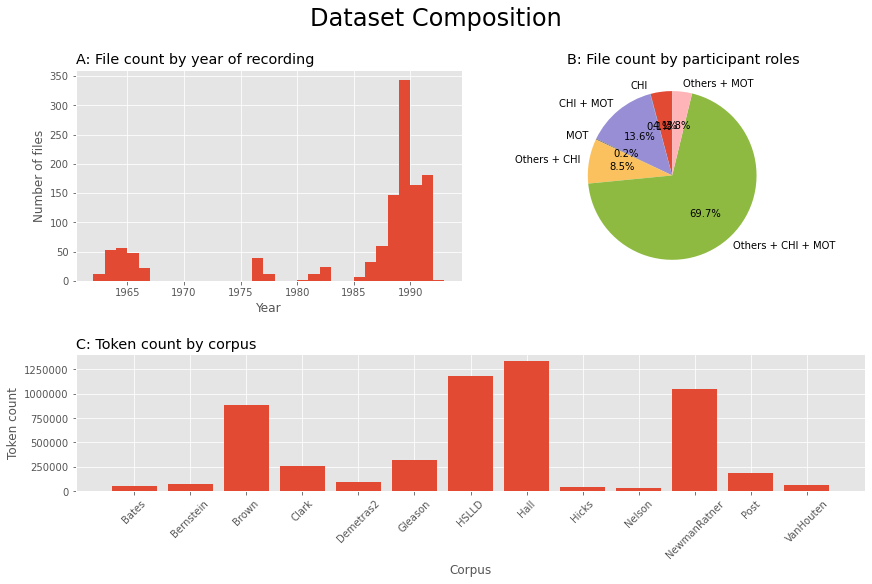

In [11]:
participants_ser = data_idx.participants.map(list)

for participants in participants_ser:
    for idx, role in enumerate(participants):
        if role != 'CHI' and role != 'MOT':
            participants[idx] = 'Others'
    participants.sort()

# Convert list in each series item to set to remove repeated elements
participants_ser = participants_ser.map(set)

# Since .groupby() method doesn't work on set, convert set to string first.
# Convert set to string by joining all items in the set
participants_ser = participants_ser.map(' + '.join)

# ------------------------------------------------------------------------------
# Data for plotting
# Count files by participant role
participant_count = participants_ser.groupby(participants_ser).aggregate('count')

# Count tokens by corpus
print('Counting tokens...')
tokens = [len(pylangacq.Reader.from_files([f], parallel=False).tokens()) 
          for f in tqdm(data_idx.file_path)]
tokens_df = pd.DataFrame({'token_count':tokens,'corpus':data_idx.corpus})
tok_by_corpus = tokens_df.groupby('corpus').sum().reset_index()


# ------------------------------------------------------------------------------
# Create a figure object

# Subplot dimension ratio
gs_kw = dict(width_ratios=[1,1], height_ratios=[2,1.3])

# Create a figure with 5 axes (i.e. 5 subplots), namely A, B, C, D, E
fig, ax = plt.subplot_mosaic([['A','B'],
                              ['C','C']],  # Subplot C spans across two grids
                              gridspec_kw=gs_kw, figsize=(12,8),
                              constrained_layout=True)

# ------------------------------------------------------------------------------
# Plotting

# Plot A and B
ax['A'].hist(data_idx.year, 31, histtype='bar')
ax['B'].pie(participant_count, labels=participant_count.index, 
            autopct='%1.1f%%', startangle=90)
ax['C'].bar(tok_by_corpus.corpus,tok_by_corpus.token_count)

# Set x and y labels of A
ax['A'].set_xlabel('Year')
ax['A'].set_ylabel('Number of files')    

# Set x and y labels of C; disable scientific notation; rotate x-axis labels
ax['C'].set_xlabel('Corpus')
ax['C'].set_ylabel('Token count')
ax['C'].get_yaxis().get_major_formatter().set_scientific(False)
ax['C'].tick_params(axis='x', labelrotation = 45)

# Set figure and subplot titles
ax['A'].set_title('\nA: File count by year of recording', loc = 'left')
ax['B'].set_title('\nB: File count by participant roles', loc = 'left')
ax['C'].set_title('\nC: Token count by corpus', loc = 'left')
fig.suptitle('Dataset Composition', fontsize=24)

plt.show()

## 2.4 Demographics of participants

Vocabulary development can be influenced by a participant's background, such as age, sex, SES, mother's education and developmental groups (e.g. typically developing children). Let's look at these factors first to get a better idea of how the demographics looks like and what kinds of information are available in the data for further analysis.

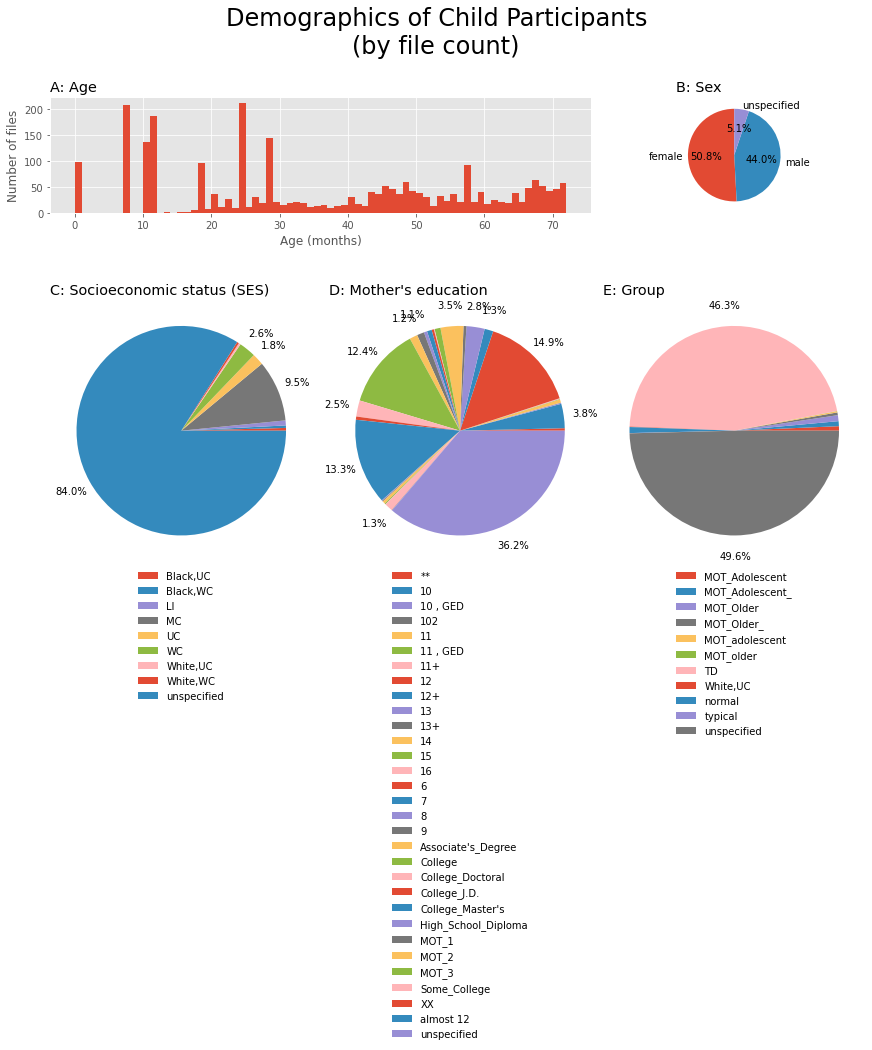

In [14]:
import matplotlib.pyplot as plt
plt.style.use('ggplot') # ggplot style

# ------------------------------------------------------------------------------
# Data for plotting
# Count files by 'sex', 'ses', 'mot_edu' or 'group'

sex_count = data_idx.groupby('sex').aggregate('count').file_path
ses_count = data_idx.groupby('ses').aggregate('count').file_path
mot_edu_count = data_idx.groupby('mot_edu').aggregate('count').file_path
group_count = data_idx.groupby('group').aggregate('count').file_path

# ------------------------------------------------------------------------------
# Create a figure object

# Subplot dimension ratio
gs_kw = dict(width_ratios=[1,1,1], height_ratios=[1,3])

# Create a figure with 5 axes (i.e. 5 subplots), namely A, B, C, D, E
fig, ax = plt.subplot_mosaic([['A', 'A', 'B'],  # Subplot A spans across two grids
                              ['C', 'D', 'E']],
                              gridspec_kw=gs_kw, figsize=(12,14),
                              constrained_layout=True)

# ------------------------------------------------------------------------------
# Plotting

# Plot A and B
ax['A'].hist(data_idx.age_m, 72, histtype='bar')
ax['B'].pie(sex_count, labels=sex_count.index, autopct='%1.1f%%', startangle=90)

# For C to E, subplots are also stored in a list for 
#   easier retrival of text objects in later steps
obj = []
obj.append(ax['C'].pie(ses_count, autopct='%1.1f%%', pctdistance=1.2))
obj.append(ax['D'].pie(mot_edu_count, autopct='%1.1f%%', pctdistance=1.2))
obj.append(ax['E'].pie(group_count, autopct='%1.1f%%', pctdistance=1.2))

# Remove percentage labels if percentage < 1%
for i in obj:
    for pct_label in i[2]:
        percent_str = pct_label.get_text()
        if float(percent_str[:-1]) < 1:
            pct_label.remove()

# Set x and y labels of A
ax['A'].set_xlabel('Age (months)')
ax['A'].set_ylabel('Number of files')

# Set legend
ax['C'].legend(ses_count.index, frameon=False,
               loc="upper center", bbox_to_anchor=(0.5,0,0,0))
ax['D'].legend(mot_edu_count.index, frameon=False,
               loc="upper center", bbox_to_anchor=(0.5,0,0,0))
ax['E'].legend(group_count.index, frameon=False,
               loc="upper center", bbox_to_anchor=(0.5,0,0,0))


# Set subplot titles
ax['A'].set_title('\nA: Age', loc = 'left')
ax['B'].set_title('\nB: Sex', loc = 'left')
ax['C'].set_title('C: Socioeconomic status (SES)', loc = 'left')
ax['D'].set_title('D: Mother\'s education', loc = 'left')
ax['E'].set_title('E: Group', loc = 'left')

# Set figure title
fig.suptitle('Demographics of Child Participants\n(by file count)', fontsize = 24)

plt.show()

We are only interested in mother's CDS. Are there participants other than the child and their mother?

As shown above in the participant demographics, different corpora use different sets of labels and definitions for the same variable (e.g. mother's education). Besides, there are files that we don't need (e.g. children in groups other than typically development). Therefore, the data needs to be cleaned a bit before further processing! 

---

# 3 Data objects for further analysis

The above code have created several data objects ready for further analysis. I will pickle these objects so that I don't need create these objects again every time.

In [13]:
data = [search_result, data_idx]

f = open('data/childes/corpus_info.pkl', 'wb')
pickle.dump(data, f, -1)
f.close()